# Project: The Loan Default Predictor 
**Goal:** Build a model to predict if a loan applicant will default (fail to pay back).
**The Battle:** Single Decision Tree vs. Random Forest.

**The Concept:**
* **Decision Tree:** A single manager making rules. Fast, but prone to bias and errors.
* **Random Forest:** A committee of 100 managers (Trees). They each look at a random subset of data and vote. The majority wins.

We expect the **Random Forest** to be more accurate because it cancels out individual errors.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Set visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
df = pd.read_csv('loan_default_data.csv')

df.head()

,Applicant_ID,Credit_Score,Annual_Income,Loan_Amount,Debt_Ratio,Defaulted
0,1,700.0,88000.0,8200.0,0.11,0
1,2,636.0,78500.0,13600.0,0.21,0
2,3,715.0,61200.0,7100.0,0.26,0
3,4,802.0,47100.0,11900.0,0.49,0
4,5,627.0,74000.0,2000.0,0.36,0


### Step 1: Preprocessing
We separate the data into:
1.  **Features (X):** Credit Score, Income, Loan Amount, Debt Ratio.
2.  **Target (y):** Defaulted (1) or Paid (0).

We also remove the `Applicant_ID` because the ID number has no impact on whether someone pays back money.

In [7]:
# 1. Define X and y
X = df.drop(['Applicant_ID', 'Defaulted'], axis=1)
y = df['Defaulted']

# 2. Split Data (80% for Training, 20% for Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=76)

print("Data Split Complete.")

Data Split Complete.


### Step 2: The Battle
We will train two models on the exact same data.

1.  **The Manager:** A single `DecisionTreeClassifier`.
2.  **The Committee:** A `RandomForestClassifier` with 100 Trees (`n_estimators=100`).

In [10]:
# 1. Train Single Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
print("Decision Tree Trained.")

# 2. Train Random Forest
forest_model = RandomForestClassifier(n_estimators=100, random_state=56)
forest_model.fit(X_train, y_train)
print("Random Forest Trained.")

Decision Tree Trained.
Random Forest Trained.


### Step 3: Who Won?
Let's check the Accuracy Score on the Test Set (the 200 applicants the models haven't seen yet).

We expect the Random Forest to score higher because financial data is "noisy" (people are unpredictable), and the Forest smoothes out that noise.

In [11]:
tree_acc = tree_model.score(X_test, y_test)
forest_acc = forest_model.score(X_test, y_test)

print("--- FINAL SCOREBOARD ---")
print(f"Single Decision Tree: {tree_acc*100:.2f}%")
print(f"Random Forest:        {forest_acc*100:.2f}%")

if forest_acc > tree_acc:
    print("\nWinner: Random Forest (The Committee wins!)")
else:
    print("\nWinner: Decision Tree (Rare, but it happens!)")

--- FINAL SCOREBOARD ---
Single Decision Tree: 85.00%
Random Forest:        88.50%

Winner: Random Forest (The Committee wins!)


### Step 4: Feature Importance
One downside of Random Forests is that you can't plot a simple flowchart (because there are 100 of them!).

However, we can ask the model: **"Which factors were most important in your voting?"**
This helps the bank understand risk.

C:\Users\Admin\AppData\Local\Temp\ipykernel_13148\1733402430.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='viridis')


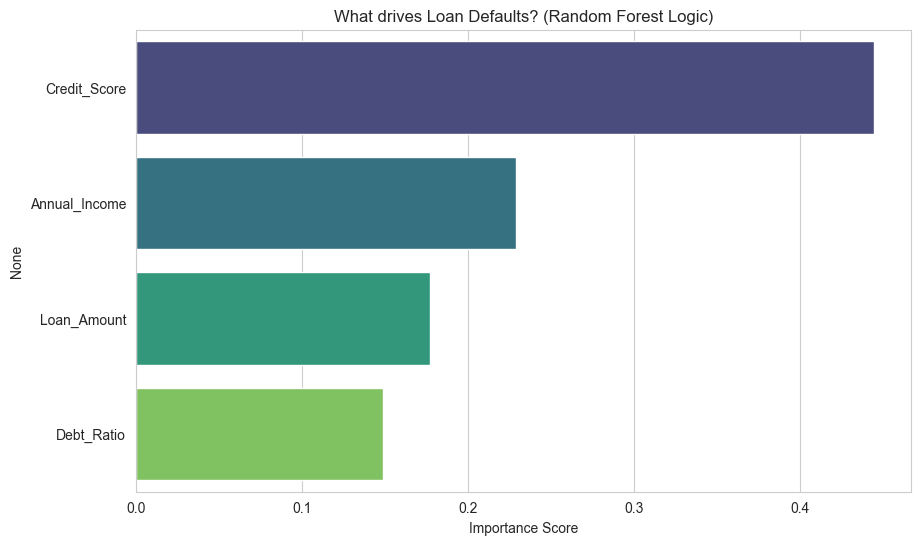

In [12]:
# Extract importance scores
importances = pd.Series(forest_model.feature_importances_, index=X.columns)

# Sort them
importances = importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, palette='viridis')

plt.title('What drives Loan Defaults? (Random Forest Logic)')
plt.xlabel('Importance Score')
plt.show()

### Conclusion
The Random Forest outperformed the single Tree.

**Why?**
A single tree might overreact to one specific outlier (e.g., a rich person who defaulted once). The Random Forest averages 100 different views, making it more robust and stable.

**Key Insight for the Bank:**
According to the Feature Importance chart, **Credit Score** and **Debt Ratio** are likely the strongest predictors of default, while **Loan Amount** matters less.